In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [101]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

#### Removing all leading and trailing whitespace from ALL column names

In [103]:
df.columns = df.columns.str.strip()

In [104]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

# Data Cleaning & Transformation

Parse Date column into datetime.
Rename columns for clarity.

In [106]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.rename(columns={'Region': 'State', 'Unemployment Rate': 'UnemploymentRate'}, inplace=True)

C:\Users\DoggyDigital\AppData\Local\Temp\ipykernel_23756\2840395091.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [107]:
# Explicitly tell pandas to interpret the first number as the day
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

## Exploratory Analysis

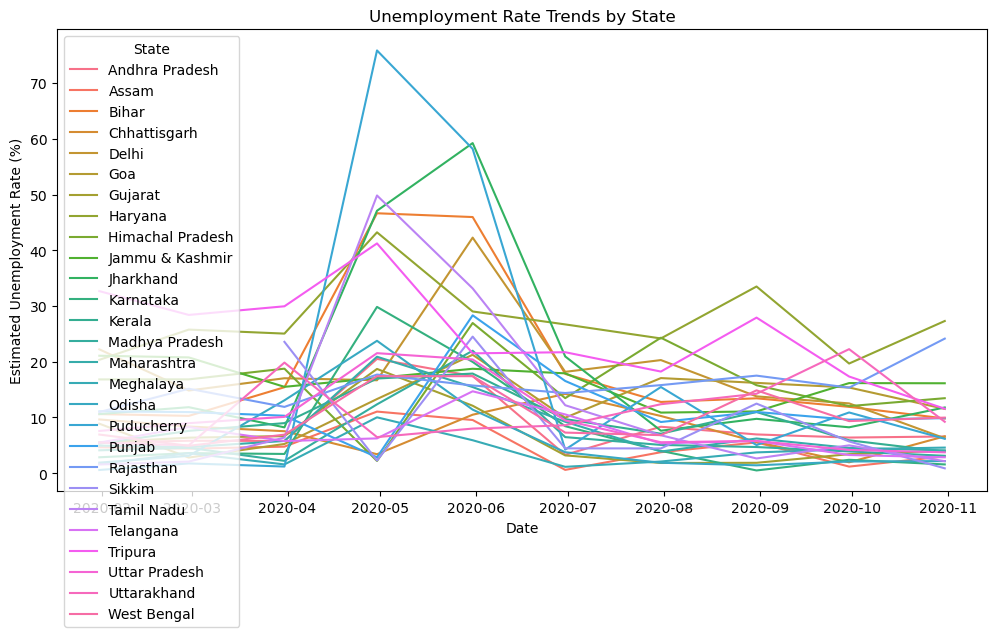

In [109]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", hue="State")
plt.title("Unemployment Rate Trends by State")
plt.show()

There is a sharp rise in unemployment across states during March–June 2020 due to COVID-19 lockdowns.

States like Haryana and Rajasthan showed the most volatility.

Southern states maintained relatively stable rates compared to northern regions.

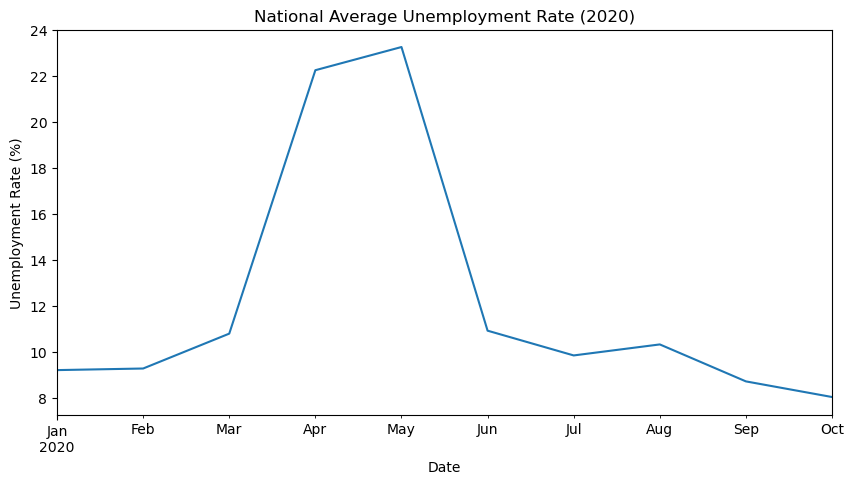

In [111]:
monthly_avg = df.groupby("Date")["Estimated Unemployment Rate (%)"].mean()
plt.figure(figsize=(10,5))
monthly_avg.plot()
plt.title("National Average Unemployment Rate (2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

National unemployment spiked above 23% in April 2020, the highest in recent history.

In [113]:
df["Month"] = df["Date"].dt.to_period("M")
heatmap_data = df.groupby(["State","Month"])["Estimated Unemployment Rate (%)"].mean().unstack()

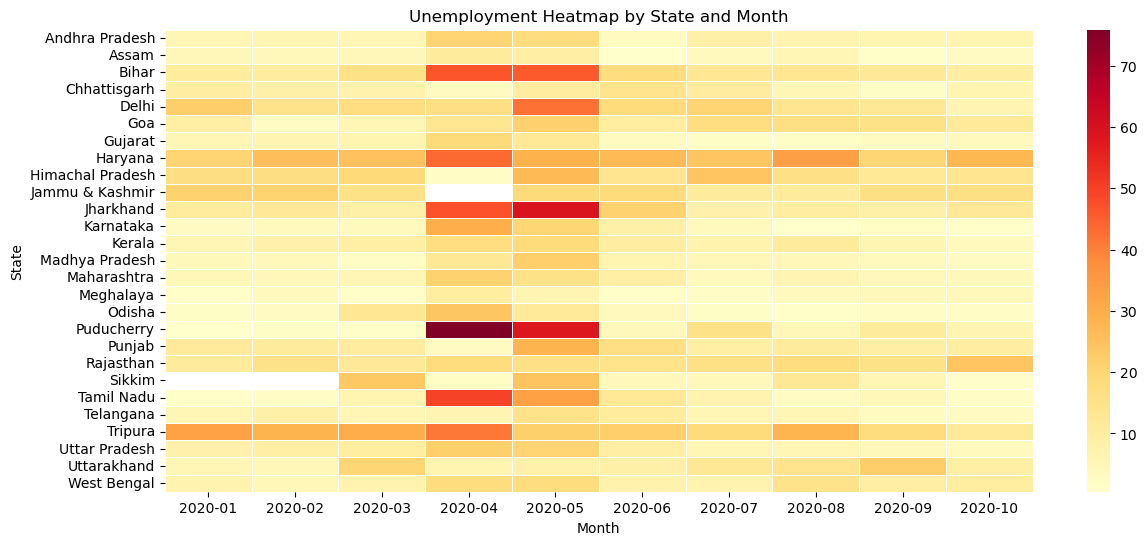

In [114]:
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5)
plt.title("Unemployment Heatmap by State and Month")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()

# Conclusion

COVID-19 had a severe short-term impact on unemployment in India, with significant state-level variations. Recovery trends appeared from mid-2020, though not uniformly across regions.